In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_pickle("data/df_final.pickle")
df

,address,rent($),rooms,beds,baths,studio,days on market,Balcony,Bike Room,Cats and Dogs Allowed,...,Smoke-free,Storage Available,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,3900 Kings Highway,2075,3.0,2.0,1.0,0,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,161 Engert Avenue,2600,4.0,2.0,1.0,0,2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1326 Ocean Avenue,2300,3.0,2.0,1.0,0,12,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,223 9th Street,2395,5.0,2.0,2.0,0,3,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,623 Park Place,4000,6.0,4.0,1.5,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,224 Eckford Street,4800,6.0,4.0,2.0,0,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2754,222 Stanhope Street,2625,6.0,4.0,1.0,0,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2755,178 Ocean Parkway,1575,3.0,0.0,1.0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2756,345 Eldert Street,2720,2.0,1.0,1.0,0,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model 1: Simple Linear Regression with Few Features

In [10]:
simple_df = df.iloc[:, 1:6]
print(simple_df.shape)
simple_df.head()

(2758, 5)


,rent($),rooms,beds,baths,studio
0,2075,3.0,2.0,1.0,0
1,2600,4.0,2.0,1.0,0
2,2300,3.0,2.0,1.0,0
3,2395,5.0,2.0,2.0,0
4,4000,6.0,4.0,1.5,0


In [103]:
df.iloc[:, 2:6]

,rooms,beds,baths,studio
0,3.0,2.0,1.0,0
1,4.0,2.0,1.0,0
2,3.0,2.0,1.0,0
3,5.0,2.0,2.0,0
4,6.0,4.0,1.5,0
...,...,...,...,...
2753,6.0,4.0,2.0,0
2754,6.0,4.0,1.0,0
2755,3.0,0.0,1.0,1
2756,2.0,1.0,1.0,0


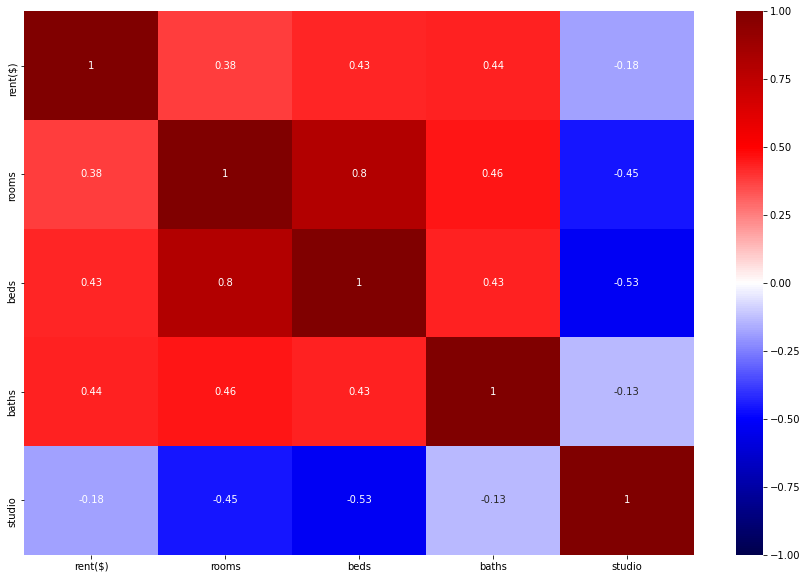

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(simple_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

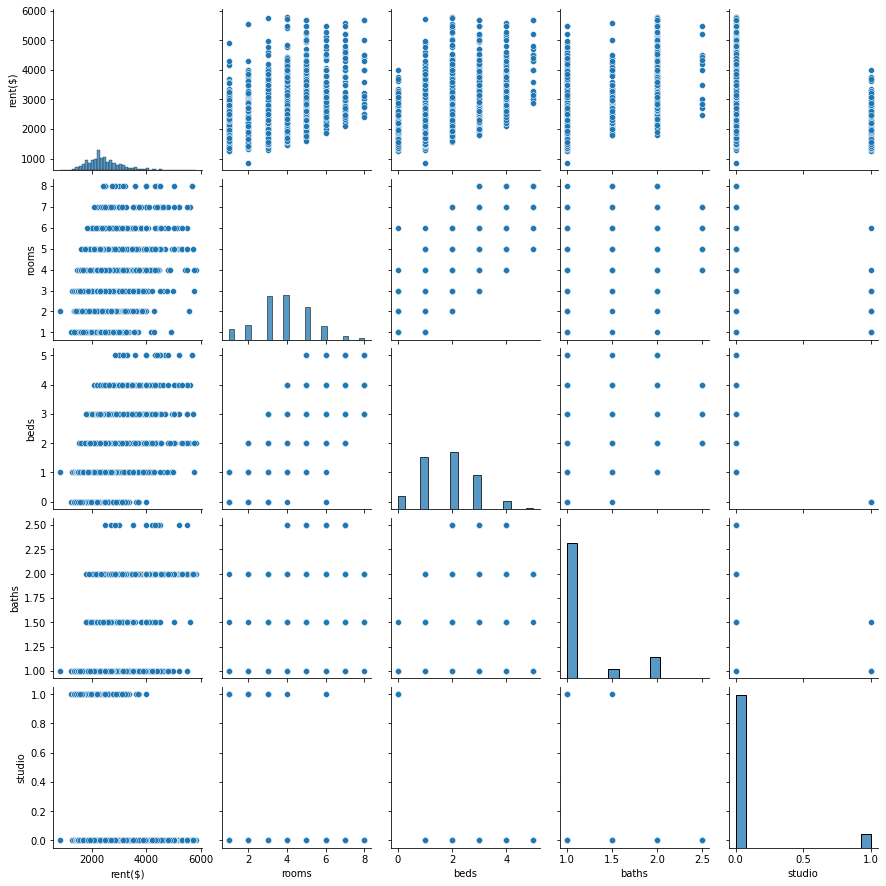

In [20]:
sns.pairplot(simple_df)

In [229]:
# Splitting into train, validate, and test sets

features, target = df.iloc[:, 2:6], df[["rent($)"]]

X, X_test, y, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state=42)

print(len(X_train))
print(len(X_val))
print(len(X_test))

1654
552
552


In [105]:
# 5 split Kfold test on training data

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=kfold)
print(scores)
print("Mean score: ", np.mean(scores))

[0.28465979 0.1833678  0.30504643 0.22958702 0.23047237]
Mean score:  0.24662668197976534


Not very high, and significant variance between the scores. Let's see a visual representation of the model, though.

In [107]:
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

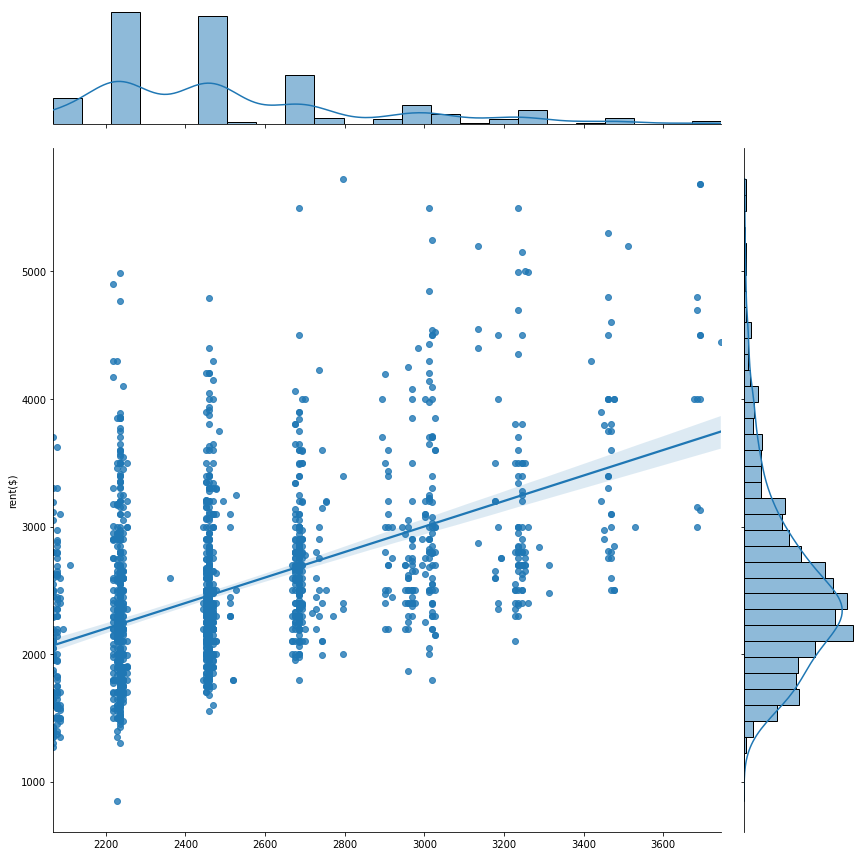

In [108]:
sns.jointplot(x = y_train_pred.flatten(), y = y_train.squeeze(), kind = "reg", height = 12)

In [109]:
print(lr.intercept_)
print(list(features.columns))
print(lr.coef_)

[1442.97935049]
['rooms', 'beds', 'baths', 'studio']
[[  8.36907003 216.23640338 551.14580533  65.95753077]]


In [88]:
lr.score(X_val, y_val)

0.24077208010234585

# Model 2: Add another feature

In [111]:
simple_df2 = df.iloc[:, 1:7]
print(simple_df2.shape)
simple_df2.head()

(2758, 6)


,rent($),rooms,beds,baths,studio,days on market
0,2075,3.0,2.0,1.0,0,6
1,2600,4.0,2.0,1.0,0,2
2,2300,3.0,2.0,1.0,0,12
3,2395,5.0,2.0,2.0,0,3
4,4000,6.0,4.0,1.5,0,0


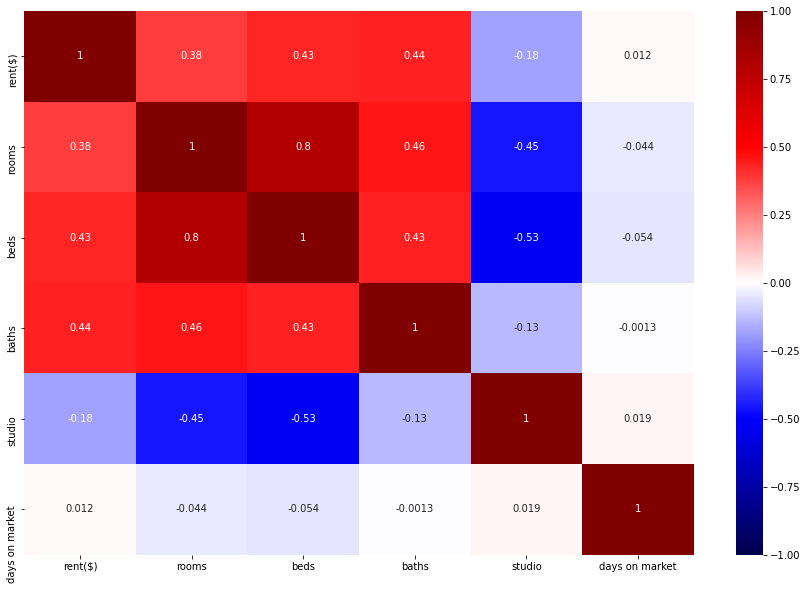

In [94]:
plt.figure(figsize = (15, 10))
sns.heatmap(simple_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

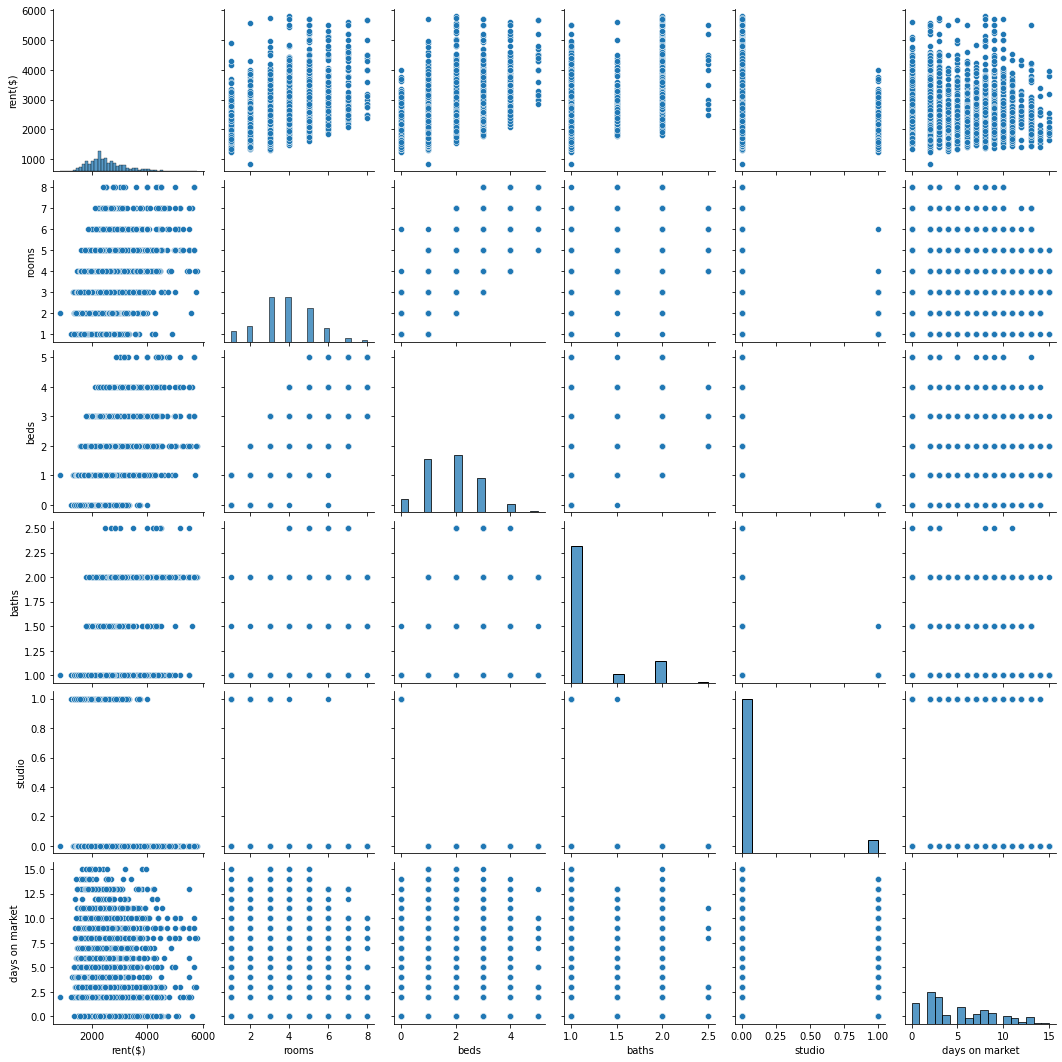

In [95]:
sns.pairplot(simple_df2)

In [112]:
# Splitting into train, validate, and test sets

features, target = df.iloc[:, 2:7], df[["rent($)"]]

X, X_test, y, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state=42)

print(len(X_train))
print(len(X_val))
print(len(X_test))

1654
552
552


In [116]:
# 5 split Kfold test on training data

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

lr2 = LinearRegression()
scores = cross_val_score(lr2, X_train, y_train, cv=kfold)
print(scores)
print("Mean score: ", np.mean(scores))

[0.28388198 0.18097879 0.30500836 0.22872147 0.2304566 ]
Mean score:  0.24580943893799315


In [118]:
lr2.fit(X_train, y_train)
y_train_pred = lr2.predict(X_train)

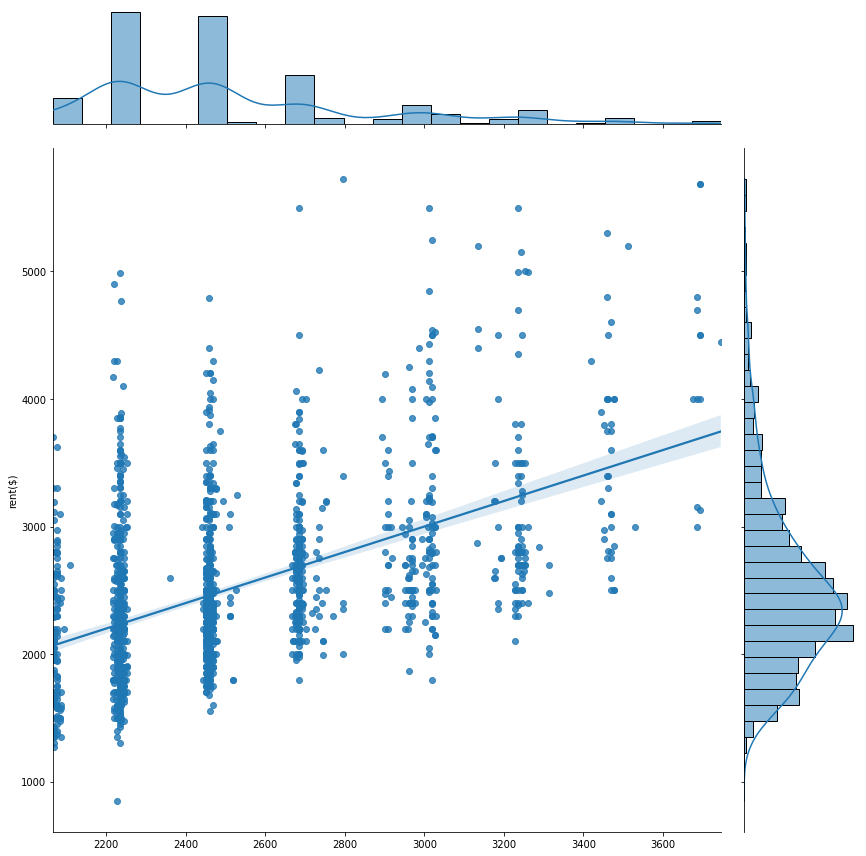

In [119]:
sns.jointplot(x = y_train_pred.flatten(), y = y_train.squeeze(), kind = "reg", height = 12)

In [120]:
print(lr2.intercept_)
print(list(features.columns))
print(lr2.coef_)

[1443.69455342]
['rooms', 'beds', 'baths', 'studio', 'days on market']
[[ 8.36431328e+00  2.16207490e+02  5.51195239e+02  6.59566023e+01
  -1.42788617e-01]]


In [122]:
lr2.score(X_val, y_val)

0.24066032444057617

# Model 3: Lasso Regression

In [141]:
df.iloc[:5, 7:]

,Balcony,Bike Room,Cats and Dogs Allowed,Central Air,Children's Playroom,City View,Cold Storage,Community Recreation Facilities,Concierge,Courtyard,...,Smoke-free,Storage Available,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [143]:
features, target = df.iloc[:, 2:], df[["rent($)"]]

X, X_test, y, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1654, 54)
(552, 54)
(552, 54)


In [146]:
alphas = 10 ** (np.linspace(-2, 2, 200))
alphas

array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-02, 2.76828663e-02, 2.89942285e-02,
       3.03677112e-02, 3.18062569e-02, 3.33129479e-02, 3.48910121e-02,
       3.65438307e-02, 3.82749448e-02, 4.00880633e-02, 4.19870708e-02,
       4.39760361e-02, 4.60592204e-02, 4.82410870e-02, 5.05263107e-02,
       5.29197874e-02, 5.54266452e-02, 5.80522552e-02, 6.08022426e-02,
       6.36824994e-02, 6.66991966e-02, 6.98587975e-02, 7.31680714e-02,
       7.66341087e-02, 8.02643352e-02, 8.40665289e-02, 8.80488358e-02,
       9.22197882e-02, 9.65883224e-02, 1.01163798e-01, 1.05956018e-01,
       1.10975250e-01, 1.16232247e-01, 1.21738273e-01, 1.27505124e-01,
      

In [148]:
mean_score_list = []

for a in alphas:
    lasso = Lasso(alpha = a)
    scores = cross_val_score(lasso, X_train, y_train, cv=kfold)
    print(scores)
    mean_score_list.append(np.mean(scores))

[0.47403627 0.43432147 0.48671195 0.51503497 0.42620313]
[0.47405761 0.43432904 0.48671636 0.51504394 0.42622651]
[0.47407996 0.43433696 0.48672114 0.51505333 0.42625098]
[0.47410336 0.43434525 0.48672613 0.51506315 0.4262766 ]
[0.47412775 0.43435394 0.48673136 0.51507344 0.42630352]
[0.4741534  0.43436302 0.48673684 0.5150842  0.4263316 ]
[0.47418026 0.43437255 0.48674257 0.51509542 0.426361  ]
[0.47420838 0.4343825  0.48674857 0.51510721 0.42639177]
[0.47423782 0.43439296 0.48675467 0.51511866 0.42642398]
[0.4742686  0.43440415 0.48676124 0.51513157 0.4264577 ]
[0.47430087 0.43441555 0.48676811 0.51514508 0.42649203]
[0.47433466 0.43442748 0.4867753  0.51515921 0.42652898]
[0.47437002 0.43444011 0.48678264 0.51517401 0.42656765]
[0.47440705 0.43445316 0.48679009 0.51518921 0.42660812]
[0.47444581 0.43446682 0.48679834 0.5152054  0.42665048]
[0.47448638 0.43448111 0.48680696 0.51522234 0.42669481]
[0.47452885 0.43449605 0.48681597 0.51524006 0.42674121]
[0.47457335 0.43451169 0.486825

[0.473669   0.44426434 0.48954437 0.48788088 0.41790531]
[0.47163594 0.44317618 0.48828285 0.48685032 0.41542715]
[0.46989378 0.44192271 0.48706764 0.48563868 0.41339271]
[0.4679692  0.44046522 0.48595849 0.48429982 0.41177373]
[0.46613065 0.43885676 0.48526251 0.4828138  0.41035458]
[0.46423075 0.43704428 0.48444389 0.48118181 0.40881505]
[0.46222778 0.43524075 0.48348811 0.47948729 0.40714432]
[0.46006247 0.43354376 0.48245431 0.47767543 0.40552325]
[0.45769344 0.43167748 0.48146095 0.47569411 0.40402142]
[0.45513464 0.42962741 0.4803824  0.47353996 0.40238639]
[0.45278842 0.42737169 0.479219   0.47120524 0.40061981]
[0.45017708 0.42489008 0.47820891 0.46866753 0.3986935 ]
[0.44729391 0.42265235 0.47707019 0.46618435 0.39659253]
[0.44414117 0.42047498 0.47578158 0.46347433 0.39430052]
[0.44069316 0.41807159 0.4743306  0.46051616 0.39179956]
[0.43692179 0.41547934 0.47269975 0.45728653 0.38907002]
[0.4327962  0.41359635 0.47086972 0.45375979 0.38609039]
[0.4282826  0.41149903 0.468819

<AxesSubplot:>

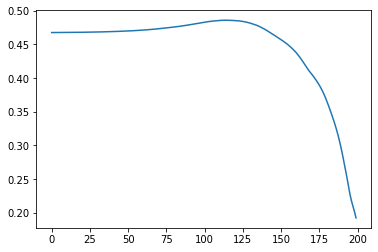

In [156]:
sns.lineplot(data = mean_score_list)

In [194]:
best_score = max(mean_score_list)
print(best_score)
best_alpha = alphas[mean_score_list.index(best_score)]
print(best_alpha)

0.4855449950510766
1.9563983435170649


In [196]:
lasso = Lasso(best_alpha)
scores = cross_val_score(lasso, X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.49804831 0.44783655 0.4972743  0.53026636 0.45429946]
0.4855449950510766


In [197]:
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)

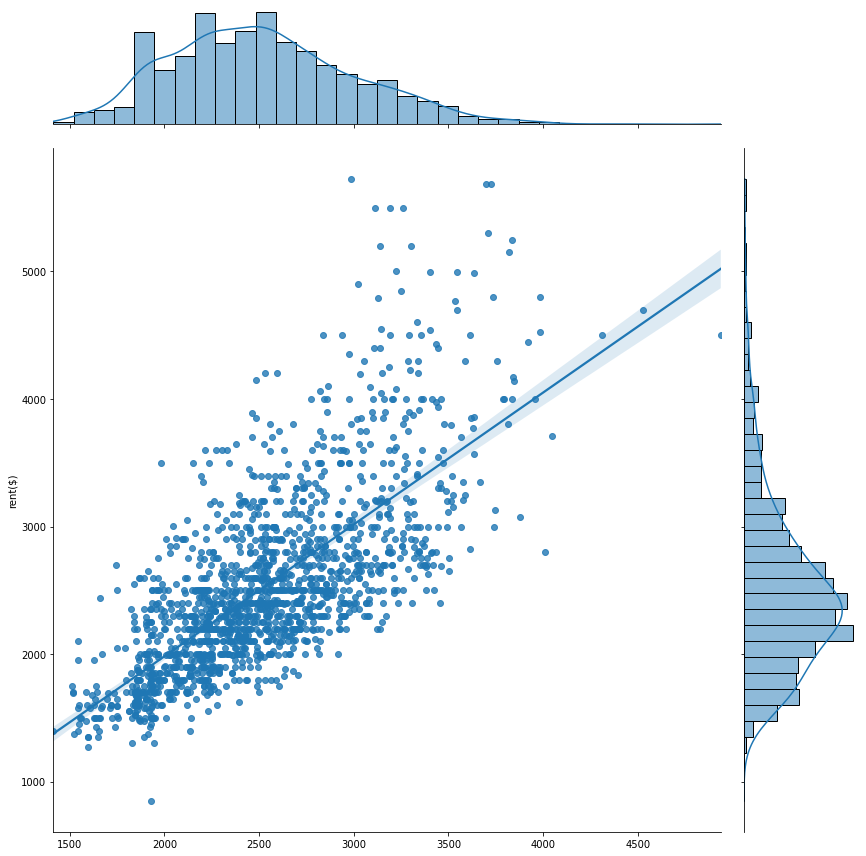

In [198]:
sns.jointplot(x = y_train_pred.flatten(), y = y_train.squeeze(), kind = "reg", height = 12)

In [199]:
print(lasso.intercept_)
coefs = dict(zip(features.columns, lasso.coef_))

[1356.77572523]


In [200]:
lasso_coef_frame = pd.DataFrame.from_dict(coefs, orient = "index", columns = ["coefficient"])
lasso_coef_frame.sort_values(by = "coefficient", ascending = False)

,coefficient
Concierge,406.219398
Water View,388.498671
baths,329.212511
Washer / Dryer in Unit,316.736976
beds,270.995151
Fireplace,247.607404
Storage Available,237.065863
Cats and Dogs Allowed,216.009136
Dishwasher,179.272271
Locker/Cage,158.050870


In [201]:
lasso.score(X_val, y_val)

0.4655625877587657

# Model 4: Ridge Regression

In [202]:
mean_score_list = []

for a in alphas:
    ridge = Ridge(alpha = a)
    scores = cross_val_score(ridge, X_train, y_train, cv=kfold)
    print(scores)
    mean_score_list.append(np.mean(scores))

[0.47366251 0.43418904 0.4866345  0.51489342 0.42582024]
[0.47366616 0.43419037 0.48663542 0.51489574 0.42582558]
[0.47366998 0.43419178 0.48663638 0.51489817 0.42583117]
[0.47367398 0.43419325 0.48663739 0.51490072 0.42583702]
[0.47367817 0.43419478 0.48663844 0.51490339 0.42584315]
[0.47368256 0.43419639 0.48663955 0.51490618 0.42584956]
[0.47368715 0.43419808 0.4866407  0.5149091  0.42585628]
[0.47369195 0.43419985 0.48664191 0.51491215 0.4258633 ]
[0.47369698 0.43420169 0.48664318 0.51491535 0.42587066]
[0.47370225 0.43420363 0.48664451 0.5149187  0.42587836]
[0.47370776 0.43420566 0.4866459  0.51492221 0.42588642]
[0.47371353 0.43420778 0.48664735 0.51492587 0.42589486]
[0.47371957 0.43421    0.48664887 0.51492971 0.42590369]
[0.47372589 0.43421233 0.48665047 0.51493373 0.42591293]
[0.47373251 0.43421476 0.48665214 0.51493793 0.4259226 ]
[0.47373943 0.43421731 0.48665389 0.51494233 0.42593272]
[0.47374668 0.43421998 0.48665572 0.51494694 0.42594331]
[0.47375427 0.43422278 0.486657

[0.48923061 0.44412905 0.49294963 0.5207962  0.44876958]
[0.48939988 0.4443705  0.49306014 0.52072075 0.44908452]
[0.48956011 0.44461332 0.49316766 0.52063383 0.44939151]
[0.48971071 0.44485727 0.49327188 0.52053508 0.44968994]
[0.48985111 0.44510208 0.49337249 0.52042416 0.4499792 ]
[0.48998073 0.44534749 0.49346916 0.52030074 0.45025867]
[0.49009896 0.4455932  0.49356156 0.52016453 0.4505277 ]
[0.4902052  0.4458389  0.49364938 0.52001522 0.45078567]
[0.49029884 0.44608425 0.49373229 0.51985253 0.45103191]
[0.49037927 0.44632891 0.49380994 0.51967621 0.45126578]
[0.49044587 0.44657251 0.493882   0.519486   0.4514866 ]
[0.490498   0.44681463 0.49394815 0.5192817  0.45169371]
[0.49053505 0.44705486 0.49400805 0.51906308 0.45188643]
[0.49055639 0.44729275 0.49406136 0.51882996 0.45206409]
[0.49056138 0.44752783 0.49410776 0.51858218 0.452226  ]
[0.49054941 0.4477596  0.4941469  0.51831957 0.45237148]
[0.49051985 0.44798753 0.49417847 0.51804202 0.45249985]
[0.49047206 0.44821105 0.494202

<AxesSubplot:>

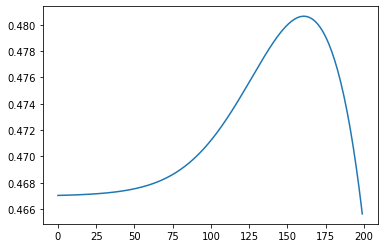

In [203]:
sns.lineplot(data = mean_score_list)

In [204]:
best_score = max(mean_score_list)
print(best_score)
best_alpha = alphas[mean_score_list.index(best_score)]
print(best_alpha)

0.480649006115532
17.225859653987875


In [205]:
ridge = Ridge(best_alpha)
scores = cross_val_score(ridge, X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.49047206 0.44821105 0.49420212 0.51774938 0.45261041]
0.480649006115532


In [206]:
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)

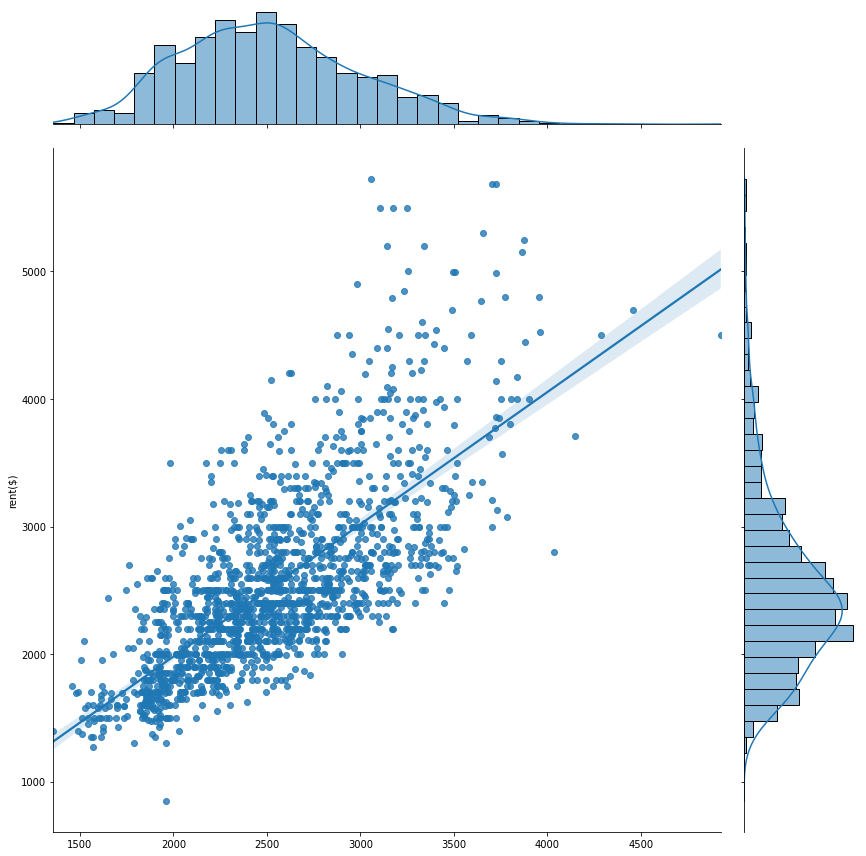

In [207]:
sns.jointplot(x = y_train_pred.flatten(), y = y_train.squeeze(), kind = "reg", height = 12)

In [219]:
print(ridge.intercept_)
coefs = dict(zip(features.columns, ridge.coef_.flatten()))

[1385.69222452]


In [220]:
ridge_coef_frame = pd.DataFrame.from_dict(coefs, orient = "index", columns = ["coefficient"])
ridge_coef_frame.sort_values(by = "coefficient", ascending = False)

,coefficient
baths,310.666933
Water View,310.166100
Washer / Dryer in Unit,302.696769
Concierge,299.219178
beds,264.552064
Fireplace,229.174195
Storage Available,203.855188
Dishwasher,183.465684
Cats and Dogs Allowed,176.771113
Locker/Cage,156.422979


In [221]:
ridge.score(X_val, y_val)

0.46444353455253484

### Summary of validation scores:
* lr1 score = 0.24
* lr2 score = 0.24
* Lasso score = 0.4655
* Ridge score = 0.4644

Lasso wins!

In [225]:
# Final retraining of model + testing on final partition
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(2206, 54)
(2206, 1)
(552, 54)
(552, 1)


In [226]:
print(lasso.alpha)
scores = cross_val_score(lasso, X, y, cv=kfold)
print(scores)
print(np.mean(scores))

1.9563983435170649
[0.43512129 0.48426493 0.43803341 0.48570802 0.56408129]
0.4814417880974746
